In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency,f_oneway
import scipy.stats as st
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv(r"C:\Users\Keyush\Desktop\research python\Projects\License status prediction\License_Data.csv")

In [83]:
df.shape

(85895, 32)

In [84]:
df.head().T

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


## Exploratory Data Analysis

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [86]:
df.dtypes

ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TE

In [87]:
df.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [88]:
df.duplicated().sum()

0

In [89]:
df['LICENSE STATUS'].value_counts()

LICENSE STATUS
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

In [90]:
## change the column name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name

In [91]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [92]:
df.head().T

,0,1,2,3,4
id,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
license_id,1256593,1639294,1980233,1476582,1896750
account_number,32811,262311,345008,273121,213785
site_number,1,29,1,1,1
legal_name,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
doing_business_as_name,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
address,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
city,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
state,IL,IL,IL,IL,IL
zip_code,60623.0,60618,60035,60439,60087


In [93]:
df["license_description"].value_counts()

license_description
Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: count, Length: 106, dtype: int64

In [94]:
df.license_description.value_counts(normalize=True)[:10]

license_description
Limited Business License             0.583014
Home Repair                          0.123791
Peddler, non-food                    0.032738
Home Occupation                      0.032703
Retail Food Establishment            0.027021
Massage Therapist                    0.022725
Street Performer                     0.021992
Scavenger, Private                   0.018034
Hazardous Materials                  0.013109
Residential Real Estate Developer    0.012655
Name: proportion, dtype: float64

## Univariate Analysis

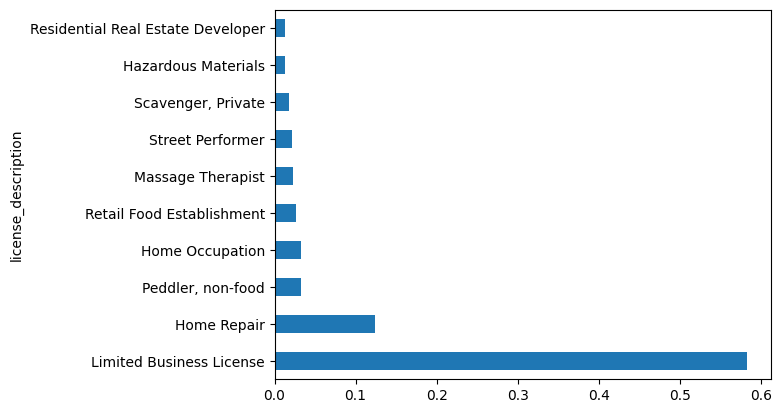

In [95]:
# Let's calculate the percentage of each job status category.
df.license_description.value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.license_description.value_counts(normalize=True)[:10].plot.barh()
plt.show()

<Axes: xlabel='latitude', ylabel='Density'>

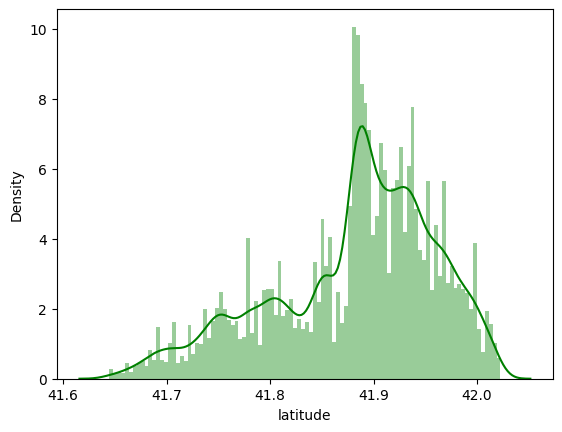

In [96]:
sns.distplot(df['latitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

<Axes: xlabel='longitude', ylabel='Density'>

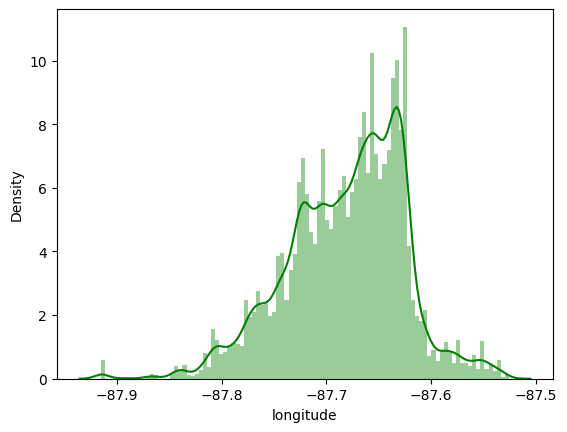

In [97]:
sns.distplot(df['longitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

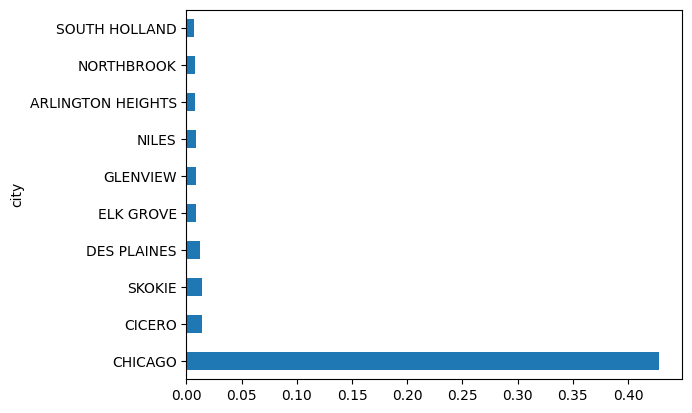

In [98]:
# Let's calculate the percentage of each job status category.
df.city.value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.city.value_counts(normalize=True)[:10].plot.barh()
plt.show()

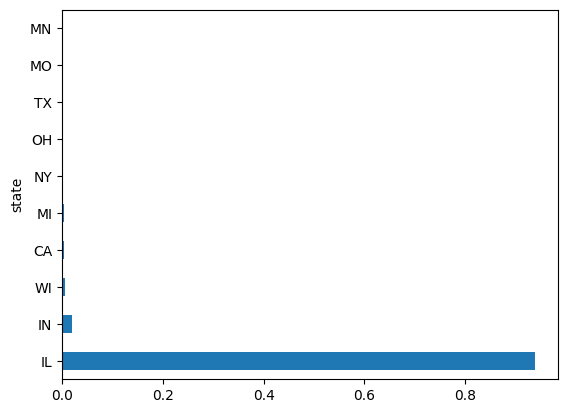

In [99]:
# Let's calculate the percentage of each job status category.
df.state.value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.state.value_counts(normalize=True)[:10].plot.barh()
plt.show()

## Bivariate Analysis

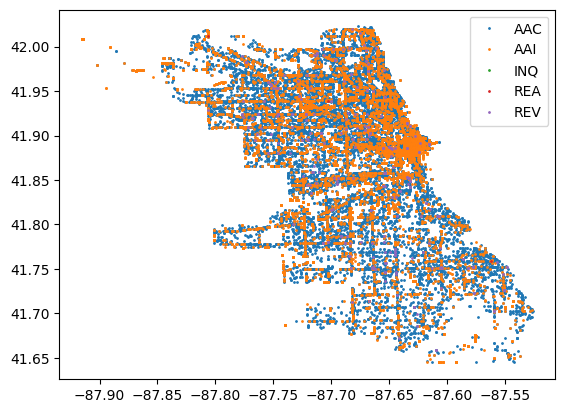

In [100]:
sdf = df[["longitude","latitude","license_status"]]
groups = sdf.groupby('license_status')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
ax.legend()

plt.show()

In [101]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


In [102]:
pd.crosstab(df["license_status"],df["application_type"]).columns

Index(['C_CAPA', 'C_EXPA', 'C_LOC', 'ISSUE', 'RENEW'], dtype='object', name='application_type')

<Axes: title={'center': 'Application Type vs License Status'}, xlabel='license_status'>

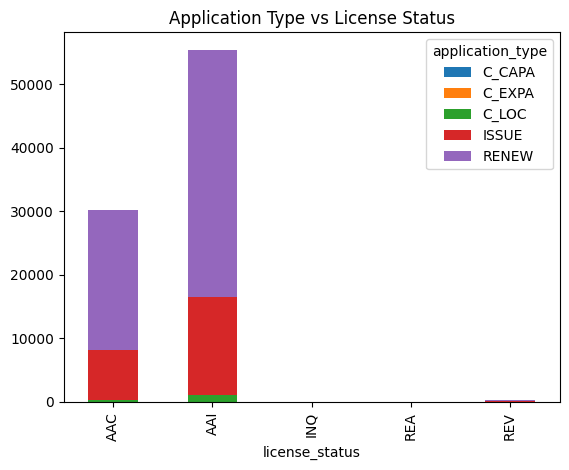

In [103]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index().plot(x='license_status', kind='bar', stacked=True,
        title='Application Type vs License Status')

In [104]:
pd.crosstab(df["license_status"],df["conditional_approval"])

conditional_approval,N,Y
license_status,,
AAC,30182,18
AAI,55400,0
INQ,2,0
REA,3,0
REV,290,0


<Axes: title={'center': 'Conditional Approval vs License Status'}, xlabel='license_status'>

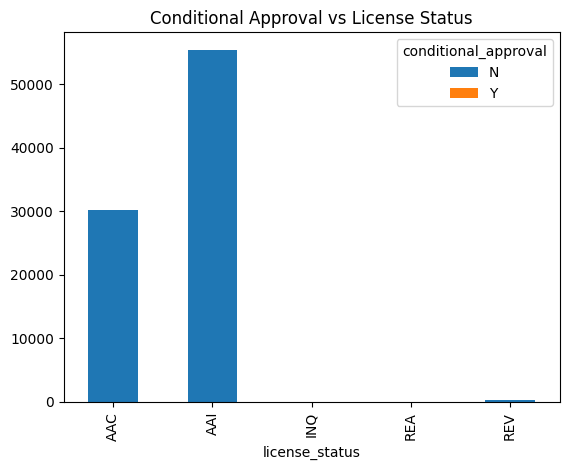

In [105]:
pd.crosstab(df["license_status"],df["conditional_approval"]).reset_index().plot(x='license_status', kind='bar', stacked=True,
        title='Conditional Approval vs License Status')

## Multivariate analysis

In [106]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,85885,85886,85887,85888,85889,85890,85891,85892,85893,85894
id,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516,2129534-20111129,1275083-20040216,1223497-20030816,1222096-20020124,1197714-20020809,...,86333-20020216,1645808-20060216,2078674-20130116,3361-20050816,1245994-20030216,12652-20120516,1821421-20070522,74137-20090116,2049545-20111016,1070196-20040216
license_id,1256593,1639294,1980233,1476582,1896750,2129534,1455178,1375248,1222096,1197714,...,1214630,1674594,2201064,1608234,1322417,2143400,1821421,1939358,2110060,1461628
account_number,32811,262311,345008,273121,213785,368042,36211,230124,223263,86252,...,81680,296566,313978,85406,204267,8011,317725,8458,2156,205936
site_number,1,29,1,1,1,1,2,1,1,3,...,2,1,2,1,2,1,1,2,43,1
legal_name,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE,QUALITY PLUMBING SERVICES INC.,FELIX BARRERA,INTERSTATE MECHANICAL & CONSTRUCTION INC,LESLIE LOCKETT,JOY CHEMMACHEL,...,WIESLAW WOLOSZYN,FANCY PAWS,EDILBERTO SERRANO PEREZ,CHICAGO TUBE & IRON CO,HAYWARD BAKER INC.,UNITED PARCEL SERVICE,"EXPRESS BOARD UP SERVICE, INC.",ARAMARK SMMS LLC,GENERAL NUTRITION CORPORATION,JUAN CARLOS ERAZO
doing_business_as_name,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE,QUALITY PLUMBING SERVICES INC.,BARRERA CONSTRUCTION,INTERSTATE MECHANICAL & CONSTRUCTION INC,DELUXE CUSTOM SERVICES,FULLERTON PULASKI SHELL,...,W. W. PERFECT CO.,FANCY PAWS,E & S LANDSCAPING,CHICAGO TUBE & IRON CO,Hayward Baker Inc.,UNITED PARCEL SERVICE,"EXPRESS BOARD UP SERVICE, INC.",ARAMARK FACILITY SERVICES,GENERAL NUTRITION CENTER # 61,CASA DE JUAN RESTAURANT
address,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR,251 OAKWOOD DR,318 N FOREST,1850 S CANAL ST,20132 DOLPHIN AVE,3959 W FULLERTON AVE 1,...,6780 W FOREST PRESERVE 1ST,2040 BRITANY BEND,1208 LINCOLN AVE,1 CHICAGO TUBE DR,1477 BARCLAY BLVD,1400 S JEFFERSON ST,8707 VANGUARD DR,2300 WARRENVILLE RD 1ST,5151 S PULASKI RD SLAB ON GRADE T-21,5814 W FULLERTON AVE
city,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN,WOOD DALE,HILLSIDE,CHICAGO,LYNWOOD,CHICAGO,...,HARWOOD HEIGHTS,LAKE IN THE HILLS,ROCKFORD,ROMEOVILLE,BUFFALO GROVE,CHICAGO,MACHESNEY PARK,DOWNERS GROVE,CHICAGO,CHICAGO
state,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,...,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
zip_code,60623.0,60618,60035,60439,60087,60191,60162,60616,60411,60647.0,...,60706.0,60156.0,61102.0,60446.0,60089.0,60607.0,61115.0,60515.0,60632.0,60639.0


<Axes: ylabel='Density'>

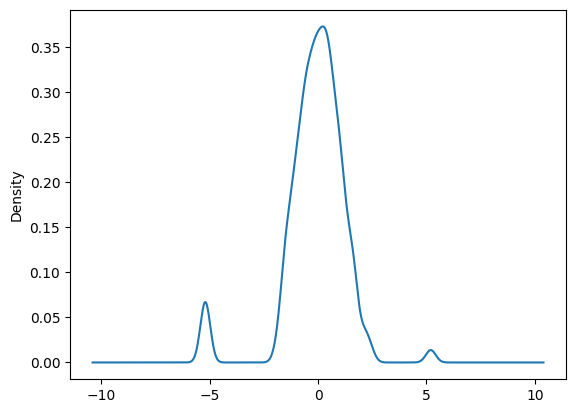

In [107]:
from sklearn.preprocessing import QuantileTransformer
qt1=QuantileTransformer(output_distribution='normal',n_quantiles=500)
df['ssa']=qt1.fit_transform(df[['ssa']])
df['ssa'].plot(kind='kde')

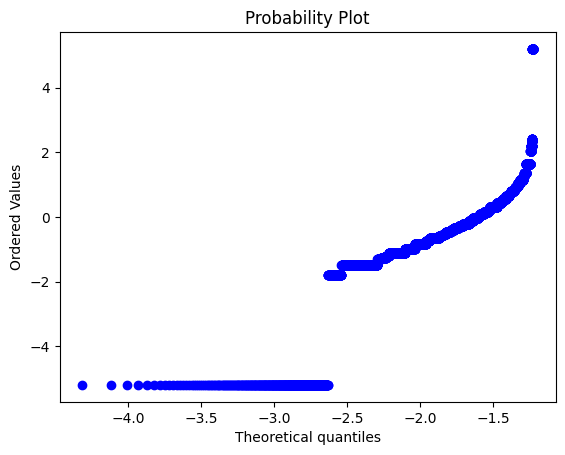

In [108]:
st.probplot(x=df['ssa'],dist='norm',plot=plt)
plt.show()

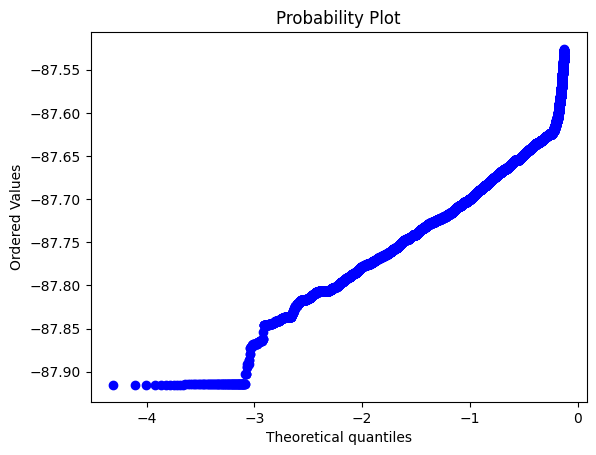

In [109]:
st.probplot(x=df['longitude'],plot=plt)
plt.show()

## Type casting

In [110]:
# convert string object into date
df.application_requirements_complete = pd.DatetimeIndex(df.application_requirements_complete)
df.payment_date = pd.DatetimeIndex(df.payment_date)
df.license_term_start_date = pd.DatetimeIndex(df.license_term_start_date)
df.license_term_expiration_date = pd.DatetimeIndex(df.license_term_expiration_date)
df.license_approved_for_issuance = pd.DatetimeIndex(df.license_approved_for_issuance)
df.date_issued = pd.DatetimeIndex(df.date_issued)

In [111]:
# Find no.of days btw different application status date
df["completion_to_start"] = (df.license_term_start_date - df.application_requirements_complete).dt.days
df["start_to_expiry"] =  (df.license_term_expiration_date - df.license_term_start_date).dt.days
df["approval_to_issuance"] = (df.date_issued - df.license_approved_for_issuance).dt.days
df["completion_to_payment"] = (df.payment_date - df.application_requirements_complete).dt.days



## Outlier Detection

<Axes: xlabel='precinct', ylabel='Density'>

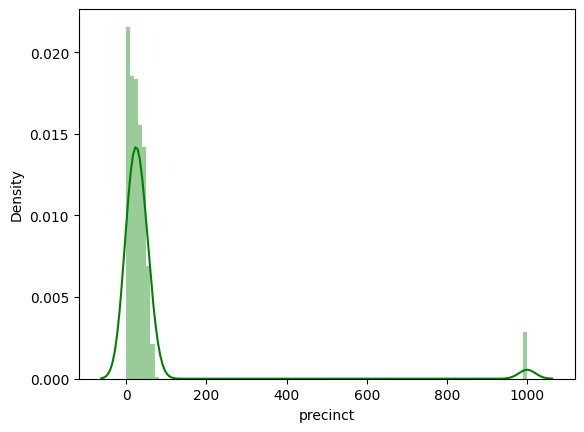

In [112]:
sns.distplot(df['precinct'], color='g', bins=100, hist_kws={'alpha': 0.4})

## Box-plot

precinct              Axes(0.125,0.786098;0.352273x0.0939024)
police_district    Axes(0.547727,0.786098;0.352273x0.0939024)
longitude             Axes(0.125,0.673415;0.352273x0.0939024)
dtype: object

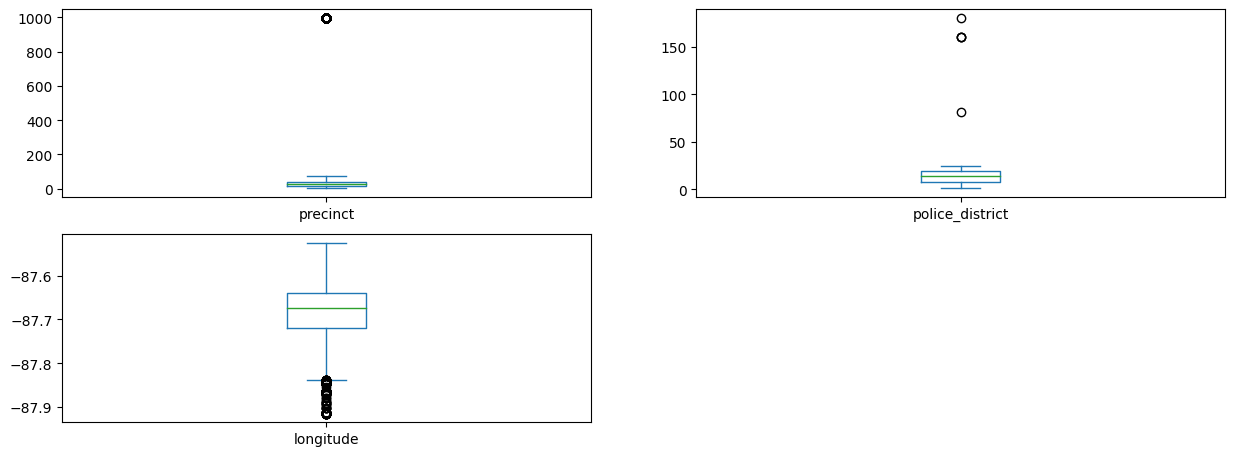

In [113]:
df[["precinct","police_district","longitude"]].plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

## Inter Quartile Range

In [114]:
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    min_ = max(np.min(col),q1 - (1.5 * iqr))
    max_ = min(np.max(col),q3 + (1.5 * iqr))
    return col[((col < min_) | (col > max_))]

In [115]:
df['longitude']=iqr(df['longitude'])

In [116]:
df['police_district']=iqr(df.police_district)

## Z-score method

In [117]:
def zscore_outlier(col,lb,ub):
    zscore = ((col - col.mean()) / col.std()).copy()
    return col[((zscore < lb) | (zscore > ub))]

In [118]:
zscore_outlier(df.precinct,-3,3)

9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64

In [119]:
##enc=ce.OneHotEncoder().fit(df.target.astype(str))
##y_onehot=enc.transform(df.target.astype(str))
##print(y_onehot.columns)

In [120]:
df.drop(['id','license_id','account_number','site_number','legal_name','doing_business_as_name','address','zip_code',
       'ward','precinct','ward_precinct','police_district','license_code','application_created_date','license_status_change_date','application_requirements_complete',
        'payment_date','license_term_start_date','license_term_expiration_date','license_approved_for_issuance','date_issued','license_status_change_date',
        'location'],axis=1,inplace=True)

In [121]:
df

,city,state,license_description,license_number,application_type,conditional_approval,ssa,latitude,longitude,license_status,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment
0,CHICAGO,IL,Limited Business License,35342.0,RENEW,N,-0.207433,41.843613,NaN,AAI,49.0,364.0,1329.0,54.0
1,CHICAGO,IL,Mobile Food Dispenser,1358463.0,RENEW,N,1.624785,41.961132,NaN,AAC,55.0,364.0,68.0,42.0
2,HIGHLAND,IL,Home Repair,1980233.0,ISSUE,N,NaN,NaN,NaN,AAI,0.0,723.0,0.0,0.0
3,LEMONT,IL,Limited Business License,1476582.0,ISSUE,N,NaN,NaN,NaN,AAI,1.0,370.0,1.0,0.0
4,WAUKEGAN,IL,Limited Business License,1141408.0,RENEW,N,NaN,NaN,NaN,AAI,53.0,729.0,1.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,CHICAGO,IL,Hazardous Materials,12652.0,RENEW,N,NaN,41.863501,NaN,AAC,62.0,729.0,1.0,53.0
85891,MACHESNEY PARK,IL,Board-Up Work,1821421.0,ISSUE,N,NaN,NaN,NaN,AAI,0.0,755.0,0.0,0.0
85892,DOWNERS GROVE,IL,Limited Business License,74137.0,RENEW,N,NaN,NaN,NaN,AAI,63.0,729.0,333.0,56.0
85893,CHICAGO,IL,Limited Business License,2049545.0,RENEW,N,NaN,41.799012,NaN,AAC,62.0,730.0,8.0,49.0


## Duplicates removal

In [122]:
df.duplicated().sum()

21

In [123]:
df=df.drop_duplicates()

In [124]:
df.duplicated().sum()

0

## Feature Selection

In [125]:
input_column = 'license_status'  # Input column name against which you want to test others
other_columns = ['city','state','license_description','application_type','conditional_approval']
# Add other columns you want to test against the input column

# Iterate over each other column
for col in other_columns:
    contingency_table = pd.crosstab(df[input_column], df[col])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpret the results for each pair of columns
    if p < 0.05:
        print(f"The columns '{input_column}' and '{col}' are statistically significantly related.")
    else:
        print(f"The columns '{input_column}' and '{col}' are not statistically significantly related.")

The columns 'license_status' and 'city' are statistically significantly related.
The columns 'license_status' and 'state' are statistically significantly related.
The columns 'license_status' and 'license_description' are statistically significantly related.
The columns 'license_status' and 'application_type' are statistically significantly related.
The columns 'license_status' and 'conditional_approval' are statistically significantly related.


## Train / Test Data Preparation

In [126]:
X=df.drop('license_status',axis=1)
y=df['license_status']

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

## Missing value Treatment

In [128]:
X_train.isna().sum()

city                         0
state                        0
license_description          0
license_number               0
application_type             0
conditional_approval         0
ssa                      61178
latitude                 37720
longitude                68491
completion_to_start        307
start_to_expiry            185
approval_to_issuance      5479
completion_to_payment     1104
dtype: int64

In [129]:
X_train=X_train.fillna(method='ffill')

In [130]:
X_train=X_train.fillna(method='bfill')

In [131]:
X_test.isna().sum()

city                         0
state                        0
license_description          0
license_number               1
application_type             0
conditional_approval         0
ssa                      15248
latitude                  9509
longitude                17126
completion_to_start         86
start_to_expiry             43
approval_to_issuance      1308
completion_to_payment      294
dtype: int64

In [132]:
X_test=X_test.fillna(method='bfill')

In [133]:
X_test=X_test.fillna(method='ffill')

In [134]:
X_test.isna().sum()

city                     0
state                    0
license_description      0
license_number           0
application_type         0
conditional_approval     0
ssa                      0
latitude                 0
longitude                0
completion_to_start      0
start_to_expiry          0
approval_to_issuance     0
completion_to_payment    0
dtype: int64

## Encoding

In [160]:
lab_enc=LabelEncoder()
y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.fit_transform(y_test)

In [136]:
classes=lab_enc.classes_
encoded_values = lab_enc.transform(classes)
for label, value in zip(classes, encoded_values):
    print(f"Class '{label}' is encoded as {value}")

Class 'AAC' is encoded as 0
Class 'AAI' is encoded as 1
Class 'INQ' is encoded as 2
Class 'REV' is encoded as 3


In [137]:
num_col=X_train.select_dtypes(include='float')
for col in num_col:
    f_value, p_value = f_oneway(X_train[col],y_train)
    
    print('F-value:', f_value)
    print('P-value:', p_value)

    # Interpret the results
    if p_value < 0.05:
        print(f'There is a statistically significant relationship between {col} and the target')
    else:
        print(f'There is no statistically significant relationship between {col} and the target')
    
   
 

F-value: 185784.800772527
P-value: 0.0
There is a statistically significant relationship between license_number and the target
F-value: 16471.390194108997
P-value: 0.0
There is a statistically significant relationship between ssa and the target
F-value: 426735217.2341099
P-value: 0.0
There is a statistically significant relationship between latitude and the target
F-value: 2008228649.3868253
P-value: 0.0
There is a statistically significant relationship between longitude and the target
F-value: 12704.818970573331
P-value: 0.0
There is a statistically significant relationship between completion_to_start and the target
F-value: 269743.16114074015
P-value: 0.0
There is a statistically significant relationship between start_to_expiry and the target
F-value: 1174.1009762773433
P-value: 3.1546079667499073e-256
There is a statistically significant relationship between approval_to_issuance and the target
F-value: 13720.214010344725
P-value: 0.0
There is a statistically significant relationship

In [138]:
target_enc=ce.TargetEncoder()

In [139]:
X_train[['city','state','conditional_approval','license_description','application_type']]=target_enc.fit_transform(X_train[['city','state','conditional_approval','license_description','application_type']],y_train)

In [140]:
X_test[['city','state','conditional_approval','license_description','application_type']]=target_enc.transform(X_test[['city','state','conditional_approval','license_description','application_type']],y_test)

In [141]:
X_train

,city,state,license_description,license_number,application_type,conditional_approval,ssa,latitude,longitude,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment
84431,0.323352,0.642198,0.756927,2087685.0,0.651662,0.658751,-0.657247,41.881967,-87.915285,48.0,729.0,1.0,19.0
62150,0.948276,0.642198,0.756927,1675101.0,0.668768,0.658751,-0.657247,41.881967,-87.915285,0.0,55.0,0.0,0.0
68463,0.323352,0.642198,0.350109,14090.0,0.651662,0.658751,-0.657247,41.920958,-87.915285,-811.0,365.0,0.0,0.0
27939,0.323352,0.642198,0.586712,2104146.0,0.668768,0.658751,-0.657247,41.886373,-87.915285,1.0,758.0,1.0,0.0
74964,0.852941,0.642198,0.756927,1246838.0,0.651662,0.658751,-0.657247,41.886373,-87.915285,57.0,364.0,0.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57661,0.323352,0.642198,0.124329,66415.0,0.651662,0.658751,0.316658,41.953048,-87.864215,49.0,364.0,3.0,42.0
84004,0.864284,0.642198,0.756927,1442029.0,0.668768,0.658751,0.316658,41.953048,-87.864215,1.0,137.0,1.0,0.0
40759,0.897959,0.642198,0.756927,1357518.0,0.651662,0.658751,0.316658,41.953048,-87.864215,58.0,819.0,5.0,16.0
19778,0.946746,0.642198,0.432367,1247067.0,0.651662,0.658751,0.316658,41.953048,-87.864215,61.0,364.0,1.0,60.0


## Modeling

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=3)
scaler = MinMaxScaler()
scaler.fit(X_train)
knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68      4812
           1       0.90      0.81      0.85     12355
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         8

    accuracy                           0.79     17175
   macro avg       0.30      0.31      0.31     17175
weighted avg       0.82      0.79      0.80     17175



In [143]:
# Logistic regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.04      0.42      0.07       545
           1       0.97      0.65      0.78     16616
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        14

    accuracy                           0.64     17175
   macro avg       0.20      0.21      0.17     17175
weighted avg       0.94      0.64      0.76     17175



In [144]:
# Naive Bayes

nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.94      0.53      6015
           1       0.81      0.13      0.23     11110
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00        49

    accuracy                           0.42     17175
   macro avg       0.55      0.52      0.44     17175
weighted avg       0.66      0.42      0.34     17175



In [145]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6015
           1       0.89      0.89      0.89     11110
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00         0

    accuracy                           0.85     17175
   macro avg       0.34      0.34      0.34     17175
weighted avg       0.85      0.85      0.85     17175



In [146]:
# Random Tree

rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

In [147]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6015
           1       0.93      0.91      0.92     11110
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00         0

    accuracy                           0.90     17175
   macro avg       0.35      0.36      0.36     17175
weighted avg       0.90      0.90      0.90     17175



In [149]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      6015
           1       0.91      0.82      0.86     11110
           2       0.00      0.00      0.00         1
           3       0.06      0.02      0.03        49

    accuracy                           0.83     17175
   macro avg       0.42      0.42      0.42     17175
weighted avg       0.84      0.83      0.83     17175



In [150]:
## xgboost
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [151]:
y_pred = xg_model.predict(X_test)
metrics.f1_score(y_test,y_pred,average="micro")

0.9024163027656478

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6015
           1       0.94      0.92      0.93     11110
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00         0

    accuracy                           0.90     17175
   macro avg       0.36      0.36      0.36     17175
weighted avg       0.90      0.90      0.90     17175



In [153]:
import pickle
pickle.dump(rf_model,open('licprediction.pkl','wb'))

In [154]:
model = pickle.load(open('licprediction.pkl', 'rb'))